In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
credit = pd.read_csv('C:/Users/Administrator/Desktop/Datasets/credit-default.csv')
credit['default'].head()

0    1
1    2
2    1
3    1
4    2
Name: default, dtype: int64

In [4]:
credit['default'].value_counts()

1    700
2    300
Name: default, dtype: int64

In [5]:
pd.isnull(credit).sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [6]:
credit_dummies = pd.get_dummies(credit)

In [7]:
credit_dummies.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,...,housing_own,housing_rent,telephone_none,telephone_yes,foreign_worker_no,foreign_worker_yes,job_mangement self-employed,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,1,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,2,1,1,0,...,1,0,1,0,0,1,0,1,0,0
2,12,2096,2,3,49,1,1,2,0,0,...,1,0,1,0,0,1,0,0,0,1
3,42,7882,2,4,45,1,1,2,0,1,...,0,0,1,0,0,1,0,1,0,0
4,24,4870,3,4,53,2,2,2,0,1,...,0,0,1,0,0,1,0,1,0,0


## Improving model's performance
   - Feature selection
        - Correlation, Chi-Square, ANNOVA
   - Feture extraction
        - Principal Component Analysis
   - Feature engineering
        - Create new columns, transform numerical individual columns(log, sqrt,...)
   - Hyperparametric tuning
   - ...

# PCA

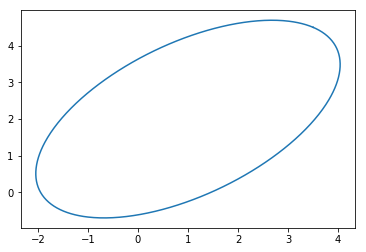

In [10]:
ellipse = pd.read_csv('ellipse.csv')

import matplotlib.pyplot as plt
plt.plot(ellipse['x'], ellipse['y'])

In [11]:
ellipse.shape

(629, 2)

In [13]:
ellipse.corr()

,x,y
x,1.000000,0.552432
y,0.552432,1.000000


In [14]:
from numpy.linalg import eig
evalue, evector = eig(ellipse.corr())

In [15]:
evalue

array([1.552432, 0.447568])

In [16]:
evector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [18]:
ellipse.head()

,x,y
0,3.500000,4.500000
1,3.482555,4.509875
2,3.464861,4.519499
3,3.446921,4.528871
4,3.428737,4.537990


In [17]:
from sklearn.decomposition import PCA
pc_class = PCA()

pcs = pd.DataFrame(pc_class.fit_transform(ellipse), columns=['PC1', 'PC2'])
pcs.head()

,PC1,PC2
0,-3.510896,-0.382795
1,-3.503481,-0.401419
2,-3.495715,-0.420003
3,-3.487598,-0.438545
4,-3.479133,-0.457043


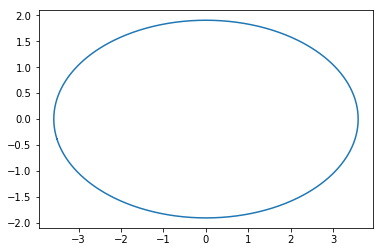

In [21]:
plt.plot(pcs['PC1'], pcs['PC2'])

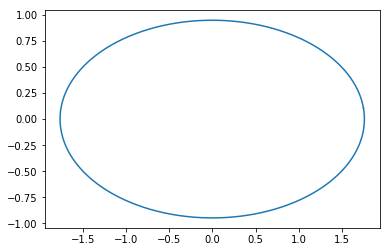

In [44]:
scaler = StandardScaler()
ellipse_scaled = scaler.fit_transform(ellipse)

pcs = pd.DataFrame(np.dot(ellipse_scaled, evector), columns=['PC1', 'PC2'])

plt.plot(pcs['PC1'], pcs['PC2'])

In [45]:
pcs_reduced = pcs
pcs_reduced['PC2'] = 0
pcs_reduced.head()

,PC1,PC2
0,1.748056,0
1,1.745987,0
2,1.743744,0
3,1.741326,0
4,1.738733,0


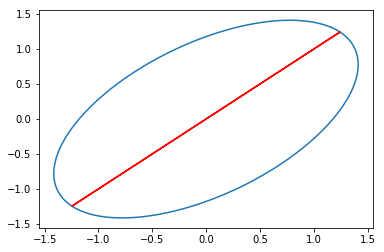

In [46]:
ellipse_reconstructed = np.dot(pcs_reduced, np.matrix.transpose(evector))
ellipse_reconstructed = pd.DataFrame(ellipse_reconstructed, columns=ellipse.columns)

df_ellipse_scaled = pd.DataFrame(ellipse_scaled, columns=['x','y'])
plt.plot(df_ellipse_scaled['x'], df_ellipse_scaled['y'])
plt.plot(ellipse_reconstructed['x'], ellipse_reconstructed['y'], color = 'red')

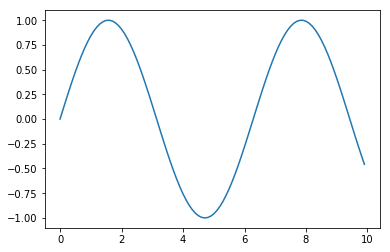

In [54]:
a = np.arange(0,10 , .10)
b = np.sin(a)
plt.plot(a,b)

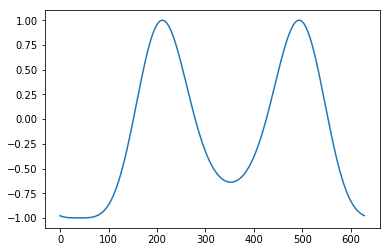

In [58]:
b = np.sin(ellipse['y'])
plt.plot(b)

In [59]:
credit_dummies.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents,checking_balance_1 - 200 DM,checking_balance_< 0 DM,...,housing_own,housing_rent,telephone_none,telephone_yes,foreign_worker_no,foreign_worker_yes,job_mangement self-employed,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,1,1,0,1,...,1,0,0,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,2,1,1,0,...,1,0,1,0,0,1,0,1,0,0
2,12,2096,2,3,49,1,1,2,0,0,...,1,0,1,0,0,1,0,0,0,1
3,42,7882,2,4,45,1,1,2,0,1,...,0,0,1,0,0,1,0,1,0,0
4,24,4870,3,4,53,2,2,2,0,1,...,0,0,1,0,0,1,0,1,0,0


In [60]:
train, test = train_test_split(credit_dummies, test_size = 0.3, random_state = 100)
train_x = train.drop('default', axis = 1)
test_x = test.drop('default', axis = 1)
train_y = train['default']
test_y = test['default']

In [66]:
m1 = RandomForestClassifier(random_state=100)
m1.fit(train_x,train_y)
test_pred1 = m1.predict(test_x)

from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(test_pred1, test_y))
print(classification_report(test_y, test_pred1))

0.76
             precision    recall  f1-score   support

          1       0.79      0.91      0.85       219
          2       0.60      0.35      0.44        81

avg / total       0.74      0.76      0.74       300



In [63]:
m2 = RandomForestClassifier(random_state=100)

pc_transformer = PCA()
scaler = StandardScaler()
scaler.fit(train_x)

train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

pc_transformer.fit(train_x_scaled)
pcs_train = pc_transformer.transform(train_x_scaled)
pcs_test = pc_transformer.transform(test_x_scaled)


In [67]:
m2.fit(pcs_train, train_y)
test_pred2 = m2.predict(pcs_test)

print(accuracy_score(test_pred2, test_y))
print(classification_report(test_y, test_pred2))

0.74
             precision    recall  f1-score   support

          1       0.77      0.91      0.84       219
          2       0.54      0.27      0.36        81

avg / total       0.71      0.74      0.71       300



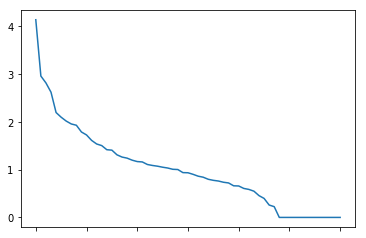

In [79]:
m3 = RandomForestClassifier(random_state=100)

cols= ['pc%d' % i for i in range(1, pcs_train.shape[1]+1)]
df_pcs = pd.DataFrame(pcs_train, columns=cols)
df_pcs_train = pd.DataFrame(pcs_train, columns=cols)
df_pcs_test = pd.DataFrame(pcs_test, columns=cols)
df_pcs.var().plot.line()


In [69]:
'PC%d' % 2

'PC2'

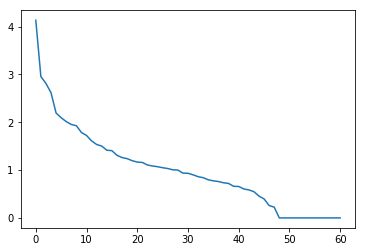

In [70]:
evalues, evectors = np.linalg.eig(pd.DataFrame(train_x_scaled).corr())
plt.plot(sorted(evalues)[::-1])

In [73]:
sorted(evalues)[::-1]

[4.1310243232251835,
 2.954531168406262,
 2.810529720163605,
 2.616428119683698,
 2.1916589702682914,
 2.0939554598473316,
 2.0129819717849324,
 1.9529853373088992,
 1.9262192431905045,
 1.785203040509816,
 1.7234934764902998,
 1.6097411206027,
 1.5344773736806672,
 1.5008993411398153,
 1.4148508389450876,
 1.405800935270482,
 1.3082366173437185,
 1.2613363693993835,
 1.2387851318071803,
 1.196079729059365,
 1.167055145751653,
 1.1592928822283415,
 1.1059680155369094,
 1.085757841973147,
 1.070337066482783,
 1.0493088238061046,
 1.0324589238665318,
 1.0059217796762416,
 1.0007029043103293,
 0.9363151808763842,
 0.9332522706448022,
 0.9005704936421733,
 0.8620312846867656,
 0.8403842770976109,
 0.7970364591522361,
 0.7750114199938297,
 0.7605174461735694,
 0.7347685751892278,
 0.7204135284520727,
 0.6607112866629246,
 0.6570921780214687,
 0.6057939827096445,
 0.5852983417741124,
 0.5482910687303972,
 0.45539286544533114,
 0.3973305857819738,
 0.25904496335640986,
 0.2247221198498567,
 9

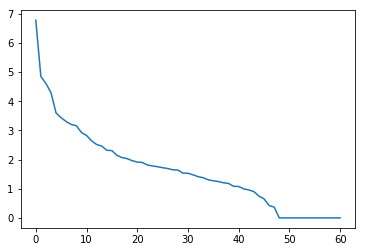

In [74]:
plt.plot(sorted(evalues/sum(evalues) * 100)[::-1])

In [77]:
cum_var = np.cumsum(sorted(evalues/sum(evalues)*100)[::-1])
(cum_var<95).sum()

41

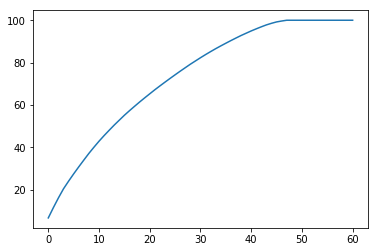

In [78]:
plt.plot(cum_var)

In [82]:
m3 = RandomForestClassifier(random_state=100)
m3.fit(df_pcs_train.iloc[:,:41],train_y)
test_pred3 = m3.predict(df_pcs_test.iloc[:,:41])

print(accuracy_score(test_y, test_pred3))
print(classification_report(test_y, test_pred3))

0.7233333333333334
             precision    recall  f1-score   support

          1       0.76      0.90      0.83       219
          2       0.48      0.25      0.33        81

avg / total       0.69      0.72      0.69       300

